# New York City Airbnb Open Data | Airbnb listings and metrics in NYC, NY, USA (2019)
## Airbnb : Hypothesis-Testing


## Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import array
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Siddharth1698/New-York-City-Airbnb-Data-Case-Study/main/AB_NYC_2019.csv')

## Loading the dataset

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Understanding the dataset

In [4]:
df.shape

(48895, 16)

## Data Cleaning

In [5]:
# Understanding the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*The data is almost 48.8k rows with 16 columns with 3 float types, 7 int types and 6 object types.*

---


In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*There are around 10k null values in the last_review and review_per_month columns and a very few null values in name and host_name.*

---

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


-  From this we can see the mean price to be around 152 dollars.

-  Average availablity of an airbnb around a year is 112 days.

---

In [8]:
# Insight about unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

*The data have 5 major locations in dataset and only 3 room types available.*

---

In [9]:
df.duplicated().sum()

0

*We do not have any duplicate rows in our dataset.*

---

## Hypothesis Testing

Taking  dataset where we have room types as homes and non-homes and their total availablity.

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.loc[df_copy['room_type'] == 'Entire home/apt', 'home'] = True
df_copy.loc[df_copy['room_type'] != 'Entire home/apt', 'home'] = False


In [ ]:
df_hyp = df_copy[['home','availability_365']]
df_hyp.head()

,home,availability_365
0,False,365
1,True,355
2,False,365
3,True,194
4,True,0


In [ ]:
df_hyp.groupby('home').count()

,availability_365
home,
False,23486
True,25409


Almost 23k airbnb's are non-homes that is a private room or shared room while 25k of them are homes.

In [ ]:
home = df_hyp['availability_365'][df_hyp['home']==True]
non_home = df_hyp['availability_365'][df_hyp['home']==False]

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

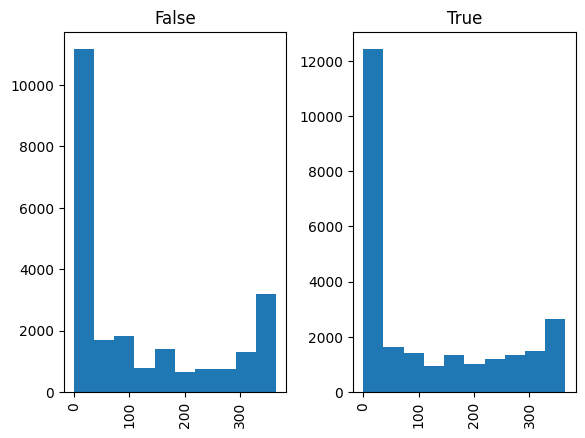

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_hyp.hist(by ='home')

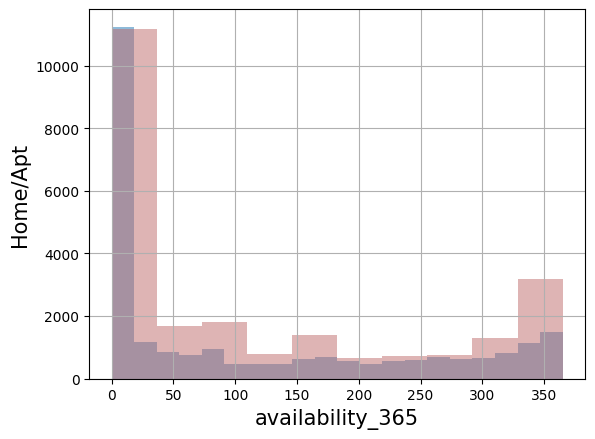

In [ ]:
import seaborn as sns
home.hist(histtype='stepfilled', alpha=.5, bins=20)     # default number of bins = 10
non_home.hist(histtype='stepfilled', alpha=.5,color=sns.desaturate("indianred", 0.75 ), bins=10)
plt.xlabel('availability_365',fontsize=15)
plt.ylabel('Home/Apt',fontsize=15)
plt.show()


On an average the non-homes were more as compared to that of homes data.

#### Hypothesis:

Null hypothsis : Availablity has no influence over airbnb being home or non-home.

Alternate : Availablity has an influence over airbnb being home or non-home.

#### Test Statics
Using the mean availablity difference of homes and non-homes.

In [ ]:
means_table =df_hyp.groupby('home').mean()
means_table

,availability_365
home,
False,113.712850
True,111.920304


On an average non homes availablity is more in a year than homes.

In [ ]:
observatied_diff = means_table['availability_365'][1] - means_table['availability_365'][0]
observatied_diff

-1.7925463792831238

#### Predicting the Statistic under null hypothesis
Simulating the null hypothesis under permuation


In [ ]:
shuffled = df_hyp.sample(len(df_hyp),replace = False)
shuffled

,home,availability_365
22052,True,187
3449,False,0
9191,False,365
43078,False,95
45683,False,112
...,...,...
32508,False,0
34698,False,15
36327,False,312
24347,True,0


In [ ]:
shuffled_availablity = shuffled['availability_365']
type(shuffled_availablity)

pandas.core.series.Series

In [ ]:
orig_and_shuff = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
orig_and_shuff

,home,availability_365,shuffled_availablity
0,False,365,187
1,True,355,0
2,False,365,365
3,True,194,95
4,True,0,112
...,...,...,...
48890,False,9,0
48891,False,36,15
48892,True,27,312
48893,False,2,0


In [ ]:
all_group_means = orig_and_shuff.groupby('home').mean()
all_group_means

,availability_365,shuffled_availablity
home,,
False,113.712850,112.620157
True,111.920304,112.930300


In [ ]:
difference = all_group_means['shuffled_availablity'][0]- all_group_means['shuffled_availablity'][1]
difference

-0.31014359820839843

In [ ]:
observatied_diff

-1.7925463792831238

#### One simulation

In [ ]:
shuffled = df_hyp.sample(len(df_hyp),replace = False)
shuffled_availablity = shuffled['availability_365']
orig_and_shuff = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
all_group_means = orig_and_shuff.groupby('home').mean()
differences = abs(all_group_means['shuffled_availablity'][0] - all_group_means['shuffled_availablity'][1])

In [ ]:
differences

1.4409242699677662

#### Permutation test
Simulating for many times and collecting the differences in an array

In [ ]:


differences = np.zeros(5000)

In [ ]:
for i in range(5000):
    shuffled = df_hyp.sample(len(df_hyp),replace = False)
    shuffled_availablity = shuffled['availability_365']
    orig_and_shuffled = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
    all_group_means = orig_and_shuffled.groupby('home').mean()
    difference = (all_group_means['shuffled_availablity'][0] - all_group_means['shuffled_availablity'][1])
    differences[i] = difference


In [ ]:
differnces_df = pd.DataFrame(differences)
differnces_df

,0
0,1.731259
1,-0.438289
2,-2.021677
3,-0.320467
4,-0.610762
...,...
4995,0.586386
4996,1.224329
4997,-1.606187
4998,-0.664429


In [ ]:
import matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

-1.7925463792831238


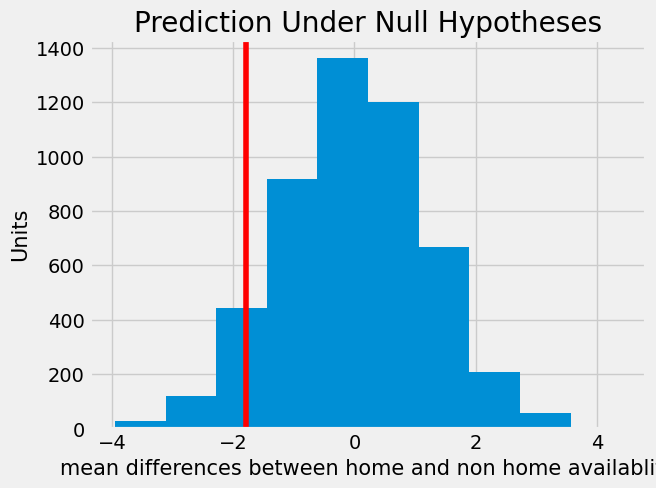

In [ ]:
differnces_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('mean differences between home and non home availablity',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.axvline(observatied_diff, color='red');
print(observatied_diff)

In [ ]:
np.count_nonzero(differences <= observatied_diff)/differences.size

0.074

The empirical P-value is nearly 0, meaning that none of the 5,000 observed samples resulted in a difference of -1.79 or lower. This is an approximation; the exact chance of getting a difference in that range is not 0 but it is vanishingly small.
#### Therefore, we reject the null hypothesis and go for alternate hypothesis. Therefore, Availablity do have an influence on airbnb being home or non-home.

## T-Test (Students T-Test)

Here, i performed t-test to check wheather the availablity of airbnb when taken a sample would change majorly with that of the overall average avaialblity of all airbnbs for airbnb's which are available for atleast more than a month.

Null hypothsis : Average availablity of Airbnbs would be same even if we take a sample of availablity data.

Alternate : Average availablity of Airbnbs would be different if we take a sample of availablity data.

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 8,8
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [ ]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    ax.set_xlim([30, 365])
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=3)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

A function to carry out plotting for distributions.

In [ ]:
df_copy.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'home'],
      dtype='object')

We are intrested to get the data of airbnb's available over a month.

In [ ]:
df_hyp = df_copy[['neighbourhood_group','availability_365']]
df_hyp = df_hyp[df_hyp['availability_365'] > 30]
df_hyp.head()

,neighbourhood_group,availability_365
0,Brooklyn,365
1,Manhattan,355
2,Manhattan,365
3,Brooklyn,194
5,Manhattan,129


We can visualize the distribution with its mean value for entire dataframe.

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

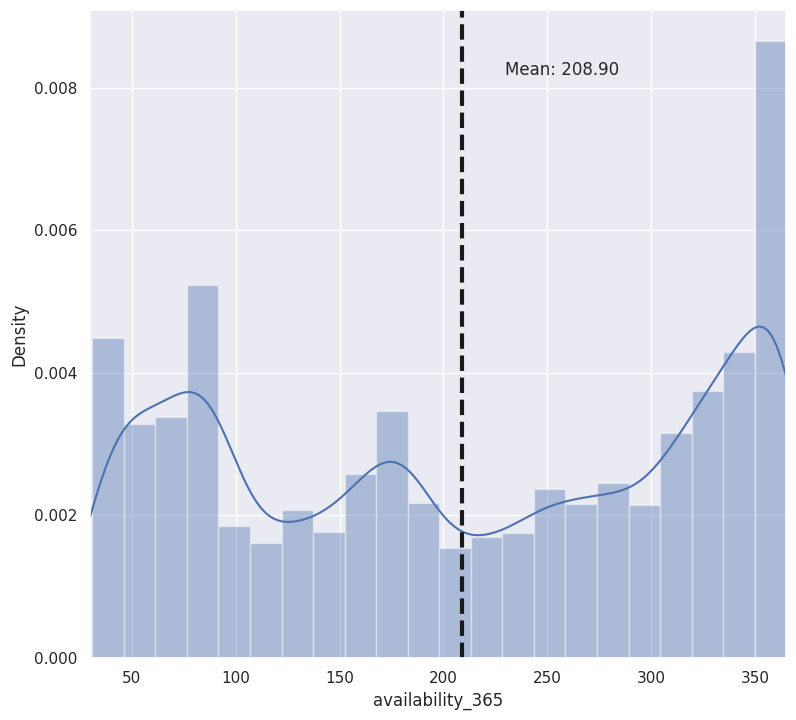

In [ ]:
plot_distribution(df_hyp['availability_365'])

I have taken a large sample of data as my data is not normal taking small sample size for t-test would be invalid.

In [ ]:
sample_size = 2000
avail_sample=np.random.choice(df_hyp['availability_365'],sample_size)
avail_sample

array([342, 127,  85, ...,  91,  39, 297])

In [ ]:
np.mean(avail_sample)

210.0335

We can visualize the distribution with its mean value for sample dataframe.

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

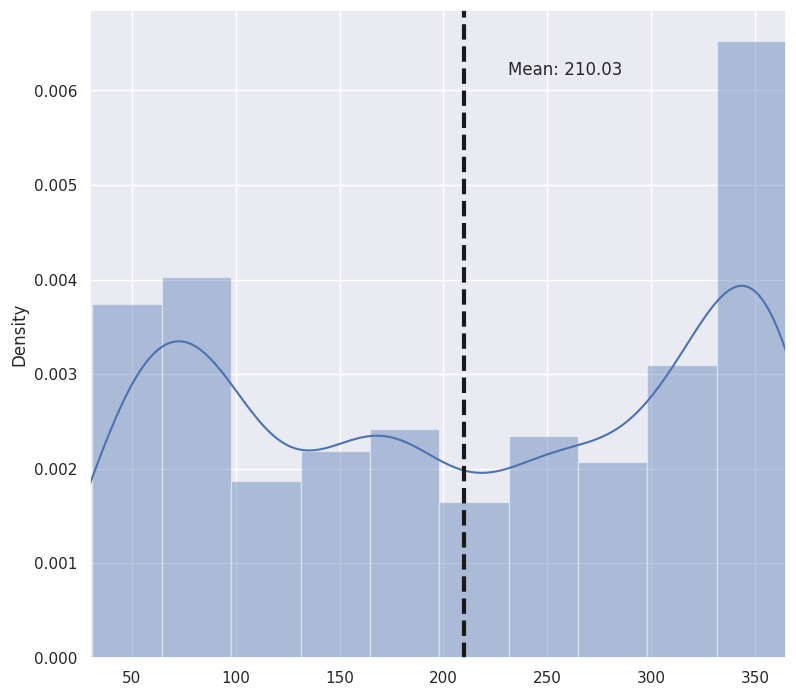

In [ ]:
plot_distribution(avail_sample)

Now we can take both homes and non-homes and plot and overlay to get the mean of each on graph.

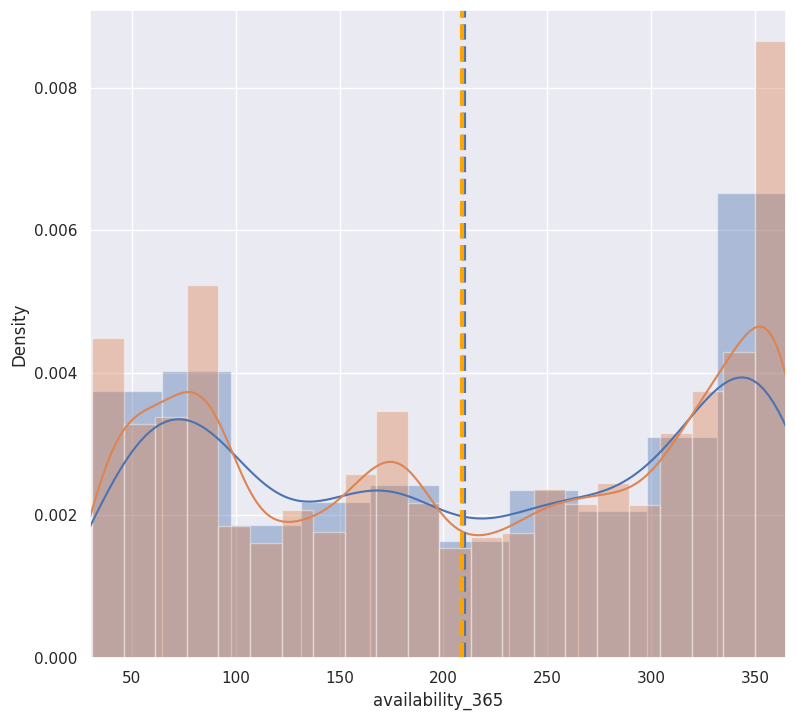

In [ ]:
plt.figure()
ax1 = sns.distplot(avail_sample)
ax2 = sns.distplot(df_hyp['availability_365'])
ax1.set_xlim([30, 365])
ax2.set_xlim([30, 365])
plt.axvline(np.mean(avail_sample), color='b', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(df_hyp['availability_365']), color='orange', linestyle='dashed', linewidth=3)

I have use Scipy library to import ttest_ind which helps us to carry out the t-test and give us the p-value.

In [ ]:
def compare_2_groups(arr_1, arr_2, alpha):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions hence we fail to reject H0(Null Hypothesis)')
    else:
        print('Different distributions hence we reject H0(Null Hypothesis)')

compare_2_groups(df_hyp['availability_365'], avail_sample, 0.05)

Statistics=-0.436, p=0.663
Same distributions hence we fail to reject H0(Null Hypothesis)


#### Here we fail to reject H0 and hence we accept the null hypothesis itself that the average availablity of Airbnbs would be same even if we take a sample of availablity data.

## Encoding Data and Outlier removal.

We can first see the box plot of the price and find some outliers and remove them so that we can do better in further steps.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Siddharth1698/New-York-City-Airbnb-Data-Case-Study/main/AB_NYC_2019.csv')

fig = px.box(df, y="price")
fig.update_layout(
    autosize=False,
    width=500,
    height=400
)
fig.show()

Here, we can see that there are a lot of outliers taking up the data, it could be expensive Airbnbs, but there are a very few of them compared to data and it overall has a huge impact and must be removed.

<Axes: >

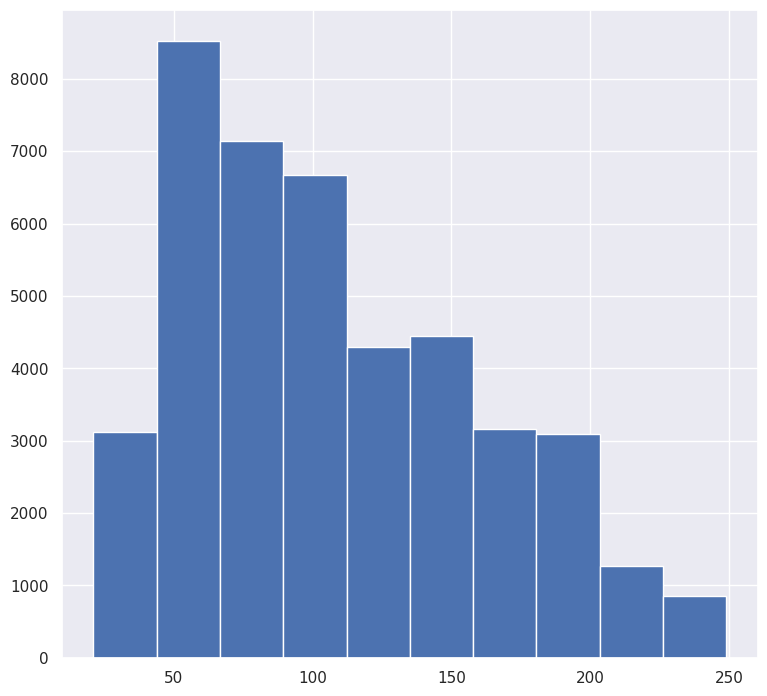

In [ ]:
dfp = df["price"][df["price"] < 250]
dfp[dfp > 20].hist()


After experimenting around values the range of (20,250) has a good gaussian wise distribution and hence we can go ahead with data in this range and remove others as outliers.

In [ ]:
df=df[df["price"]<250]
df=df[df["price"]>20]
df['room_type'].value_counts()

Private room       21722
Entire home/apt    19770
Shared room         1090
Name: room_type, dtype: int64

In [ ]:
fig = px.box(df, y="price")
fig

This is the final price data on which we are performing the rest of operations.

In [ ]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.drop(['id','host_id','latitude','longitude','host_name','last_review','name'], axis = 1,inplace=True)
df = pd.get_dummies(df, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
df.drop(["neighbourhood"], axis=1, inplace=True)
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,149,1,9,0.21,6,365,1,0,0,0,1,0
1,225,1,45,0.38,2,355,0,1,0,0,0,0
2,150,3,0,0.00,1,365,0,1,0,0,1,0
3,89,1,270,4.64,1,194,1,0,0,0,0,0
4,80,10,9,0.10,1,0,0,1,0,0,0,0


We performed an Encoding on neighbourhood and room type and removed some unwanted columns.